Projet Block matching SY32

In [15]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import data, io


In [16]:
Ig = io.imread("C:/Users/user/Desktop/SY32/projetstereo/cones/im2.png")
Id = io.imread("C:/Users/user/Desktop/SY32/projetstereo/cones/im6.png")

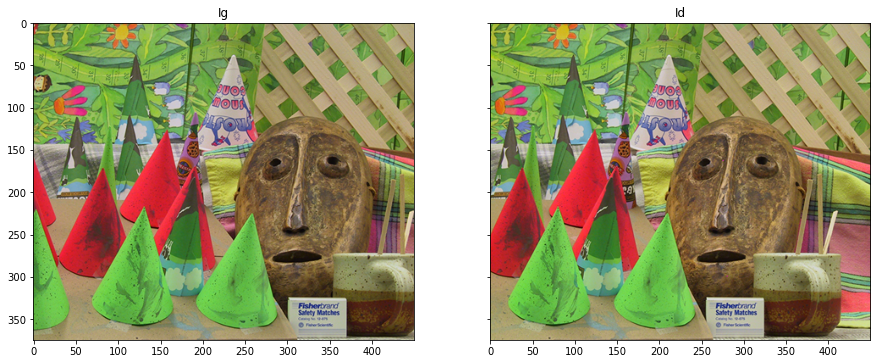

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharex=True, sharey=True)
axes[0].imshow(Ig)
axes[0].set_title("Ig")
axes[1].imshow(Id)
axes[1].set_title("Id")
plt.show()

In [31]:
Ig.shape

(375, 450, 3)

In [117]:
def sous_liste_matrice(Iliste, jdebut, jfin, idebut, ifin):
    #retourne une sous matrice sous forme d'une liste d'une autre matrice sous forme de liste 
    Iref = []
    
    #on ajoute d'abord les colonne dans notre liste qui représentera une matrice
    for j in range(jfin - jdebut):
        Iref.append([])
        
    #mtn on remplie les case
    for j in range(jfin - jdebut):
        for i in range(ifin - idebut):
            Iref[j].append(Iliste[j+jdebut][i+idebut])
            
    return Iref

In [118]:
def sum_d_abs(I1liste,I2liste):
    #retourne la somme des valeurs absolues de la différence de deux matrices sous forme de liste
    
    sum = 0
    
    for j in range(len(I1liste)):
        for i in range(len(I1liste[0])):
            sum += abs(I1liste[j][i] - I2liste[j][i])
            
    return sum

In [121]:
def get_disparite(Ig,Id,maxdisp,N):

    disparite = np.zeros(Iggray.shape)
    vect_diff = np.zeros(maxdisp).astype("int")

    axe0=disparite.shape[0]
    axe1=disparite.shape[1]
    
    Igliste = Ig.astype("int").tolist()
    Idliste = Id.astype("int").tolist()
    
    

    for i in range(axe1):
        for j in range(axe0):
            if (i>(N//2 + 1) and i<(axe1-(N//2)-1)) and (j>(N//2 + 1) and j<(axe0-(N//2)-1)) and (i>maxdisp):
                #Iref = Ig[j-N//2:(j+N//2)+1,i-N//2:(i+N//2)+1].astype("int")
                Iref = sous_liste_matrice(Igliste, j-N//2, (j+N//2)+1, i-N//2, (i+N//2)+1)
                for x in range(maxdisp):
                    #Initialisation à la première case du voisinnage
                    #diff_int = np.sum(np.abs(Iref.astype("int")-Id[j-N//2:(j+N//2)+1,i-x-N//2:(i-x+N//2)+1].astype("int")))
                    diff_int = 0
                    diff_int = sum_d_abs(Iref,sous_liste_matrice(Idliste, j-N//2, (j+N//2)+1, i-x-N//2, (i-x+N//2)+1))
                    vect_diff[x]=diff_int
                disparite[j,i]=np.argmin(vect_diff)
                
    return disparite

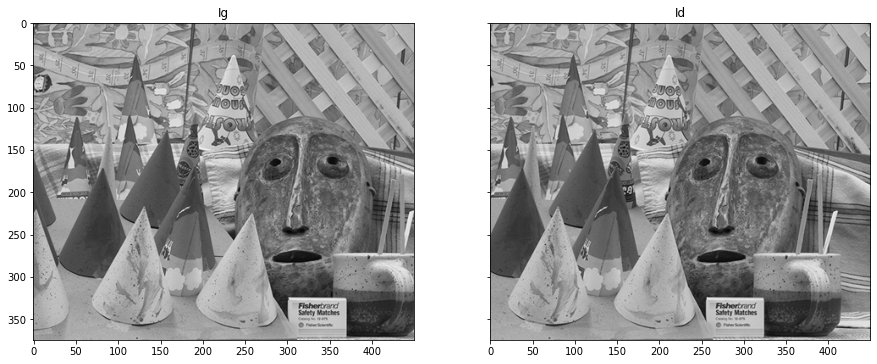

In [58]:
maxdisp=60
N=5

Iggray = (rgb2gray(Ig)*255).astype("uint8")
Idgray = (rgb2gray(Id)*255).astype("uint8")

fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharex=True, sharey=True)
axes[0].imshow(Iggray, cmap="gray")
axes[0].set_title("Ig")
axes[1].imshow(Idgray, cmap="gray")
axes[1].set_title("Id")
plt.show()

In [122]:
%%time
disparite = get_disparite(Iggray, Idgray, maxdisp, N)

Wall time: 1min 32s


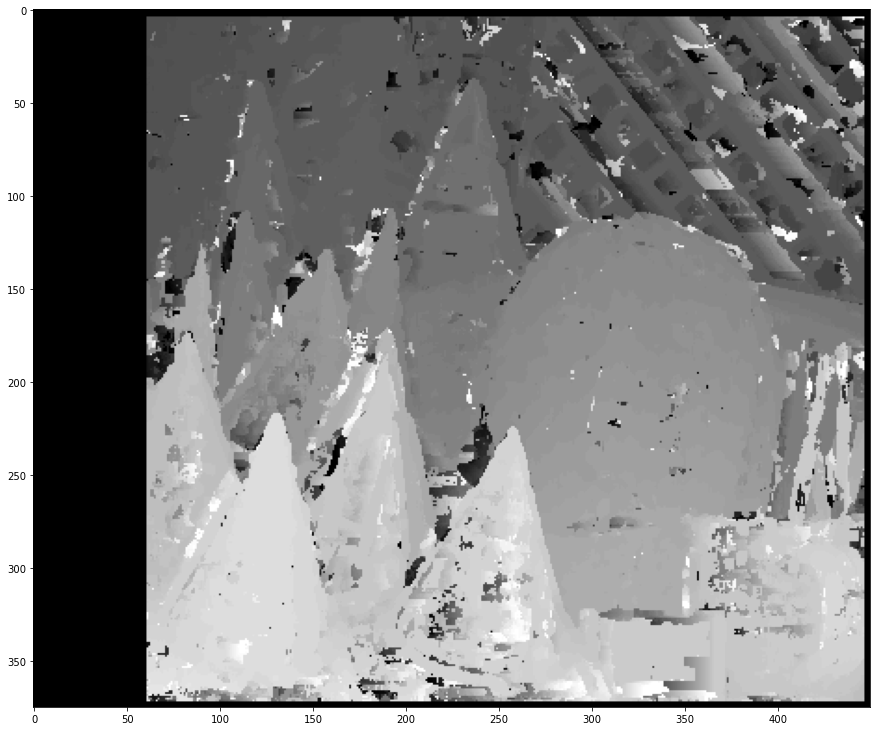

In [123]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15), sharex=True, sharey=True)
axes.imshow(disparite, cmap="gray")
plt.show()